# Heart Disease Prediction and Optimization


### The Data 
<a href='https://www.kaggle.com/code/lauriandwu/machine-learning-heart-disease-framingham'>`Heart_disease_Framingham.csv`</a> can be accessed publicly on the Kaggle website. It originates from a continuing cardiovascular study conducted on individuals residing in Framingham, Massachusetts. The primary objective of this study is to classify and forecast whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset comprises over 4,000 records and encompasses 15 attributes that contain information about the patients.

Column | Definition
--- | -----------
sex | male or female (nominal)
age | age of the patient (continuous)
currentSmoker | whether or not the patient is a current smoker (nominal)
cigsPerDay | he number of cigarettes that the person smoked on average in one day (continuous)
BPMeds | whether or not the patient was on blood pressure medication (nominal)
prevalentStroke | whether or not the patient had previously had a stroke (nominal)
prevalentHyp | whether or not the patient was hypertensive (nominal)
diabetes | whether or not the patient had diabetes (nominal)
totChol | total cholesterol level (continuous)
sysBP | systolic blood pressure (continuous)
diaBP | diastolic blood pressure (continuous)
BMI | Body Mass Index (Contincontinuousuous)
heartRate | heart rate (continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
glucose | glucose level in blood (continuous)
TenYearCHD | 10 year risk of coronary heart disease CHD (binary: “1”=“Yes”, “0”=“No”)

## Section 1: Data Understanding 

### Explore Dataset

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.mlab as mlab 
%matplotlib inline
import scipy.optimize as opt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_auc_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

In [158]:
df = pd.read_csv("Heart_disease_Framingham.csv")

In [159]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Exploratory Data Analysis

In [160]:
df['male'].value_counts()

0    2420
1    1820
Name: male, dtype: int64

In [161]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [162]:
df['currentSmoker'].value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

In [163]:
df['BPMeds'].value_counts()

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

In [164]:
df['prevalentStroke'].value_counts()

0    4215
1      25
Name: prevalentStroke, dtype: int64

In [165]:
df['diabetes'].value_counts()

0    4131
1     109
Name: diabetes, dtype: int64

In [166]:
df['glucose'].value_counts()

75.0     193
77.0     167
73.0     156
80.0     153
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: glucose, Length: 143, dtype: int64

In [167]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## Section 2: Data Preparation 

##### Handle missing values, Outliers and Duplicate Data¶

In [169]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [170]:
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


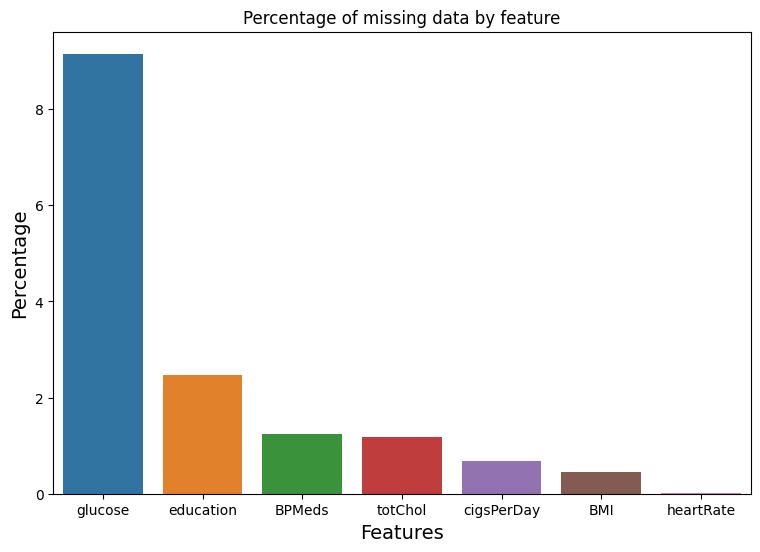

In [171]:
plt.figure(figsize=(9,6))
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [172]:
# drop education because it is not related to CHD 
df = df.drop(['education'], axis=1)

In [173]:
# fill the NaNs in cigsPerDay with the mean  
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)

In [174]:
# fill the NaNs in glucose with the mean  
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

In [175]:
# fill the NaNs in BPMeds with the mode  
df['BPMeds'].fillna(df['BPMeds'].mode(), inplace=True)

In [176]:
# fill the NaNs in totChol with the mean  
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

In [177]:
df=df.dropna()
df.shape

(4167, 15)

In [178]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

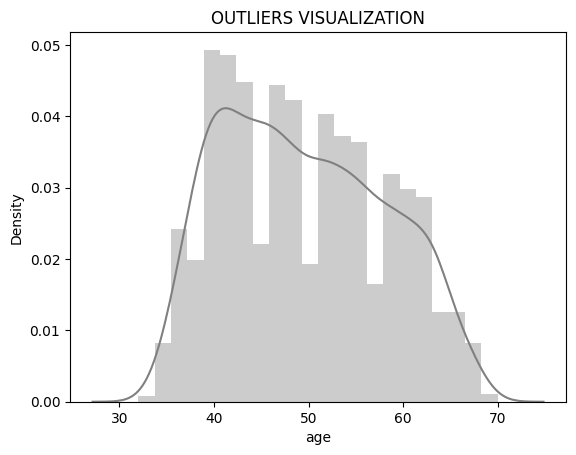

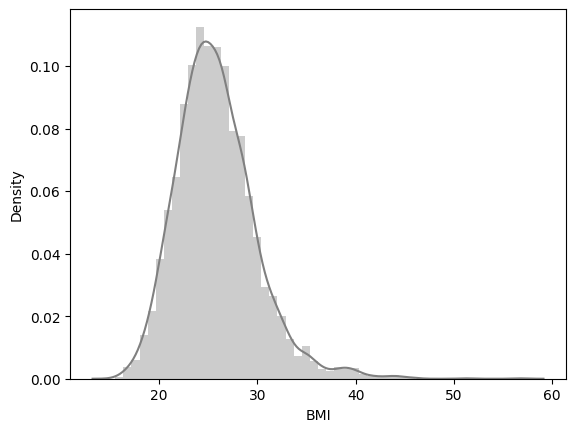

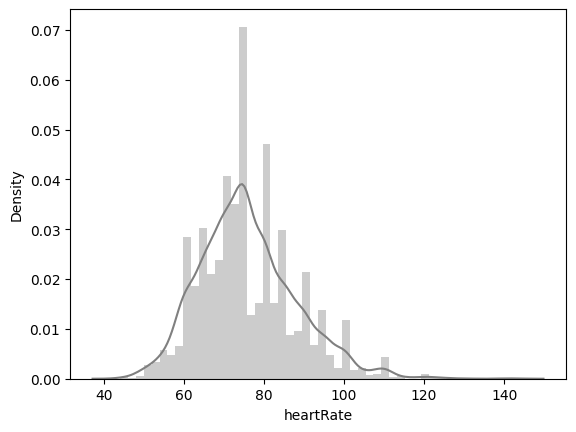

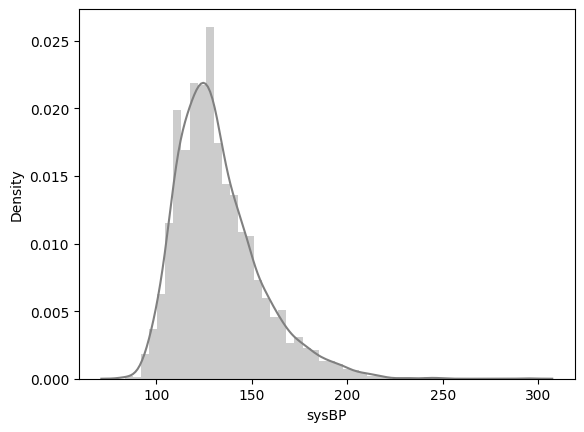

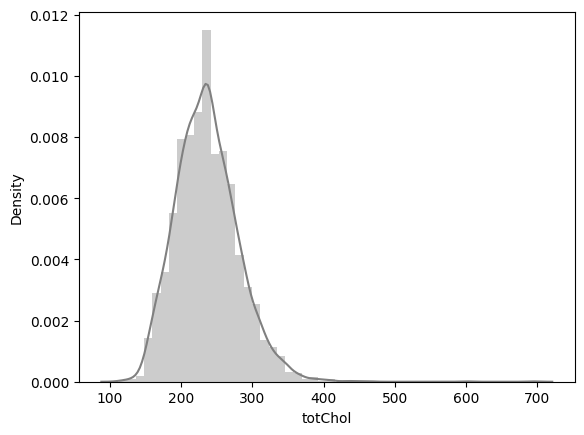

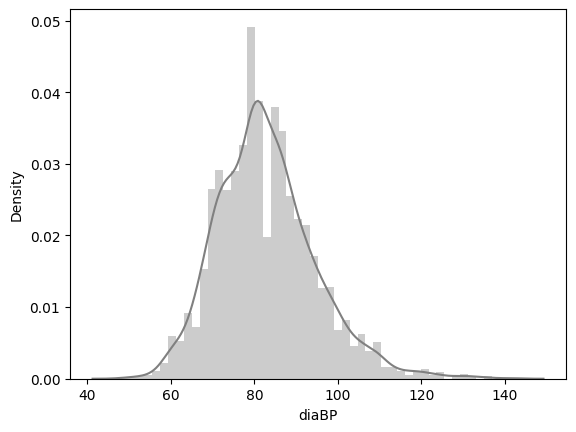

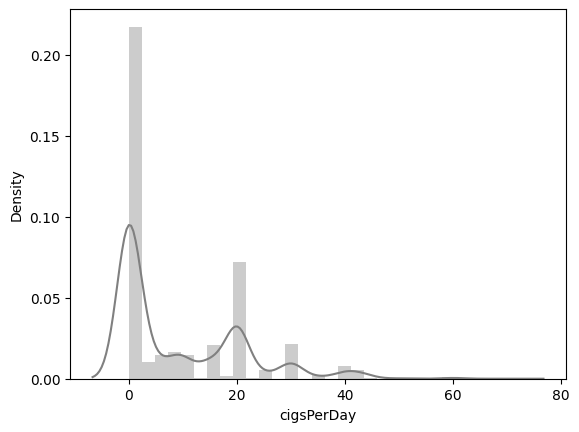

In [179]:
# check outliers by visualizing them
cols =['age','BMI','heartRate','sysBP','totChol','diaBP', 'cigsPerDay']
plt.title("OUTLIERS VISUALIZATION")
for i in cols:
    df[i]
    sns.distplot(df[i],color='grey')
    plt.show()

In [180]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000
mean,0.431725,49.517639,0.495320,9.029319,0.029518,0.005280,0.308855,0.025198,236.710722,132.263859,82.903648,25.802649,75.875690,81.927322,0.149268
std,0.495376,8.540217,0.500038,11.887741,0.169273,0.072477,0.462077,0.156745,44.236095,21.907846,11.872827,4.076572,12.059299,22.706309,0.356395
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.500000,89.750000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


##### EDA with data visualization

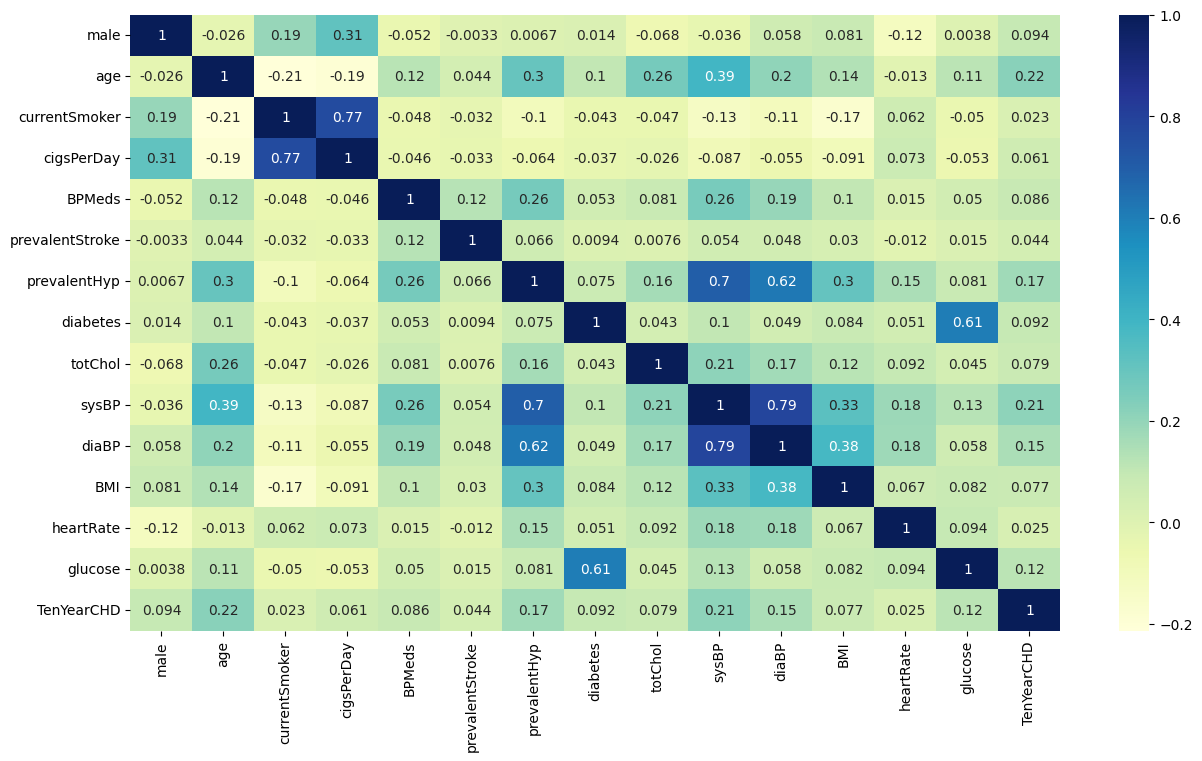

In [181]:
# Compute correlation matrix
corr = df.corr()

# Create correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap="YlGnBu", annot=True)

# Show plot
plt.show()

Observations:
* sysBP and diaBP, currentSmoker and cigsPerDay, and sisBP and prevalentHyp are highly correlated with values > 0.7
* diaBP and prevalentHyp, diabetes and glucose are correlated to some extent with values arouund 0.62

<Axes: xlabel='male', ylabel='count'>

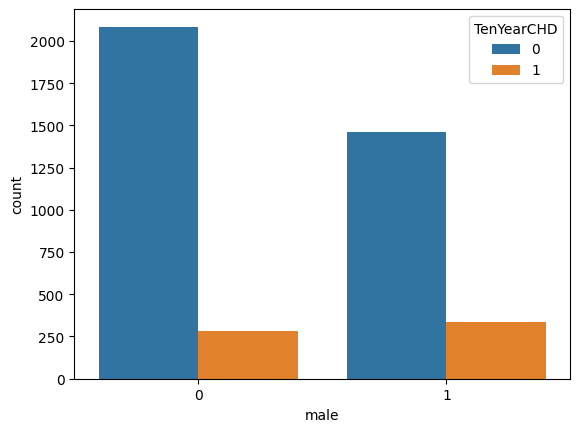

In [182]:
sns.countplot(x=df['male'], hue=df['TenYearCHD'])

Observations:
* Males have a much higer probablity of getting CHD

<Axes: xlabel='currentSmoker', ylabel='count'>

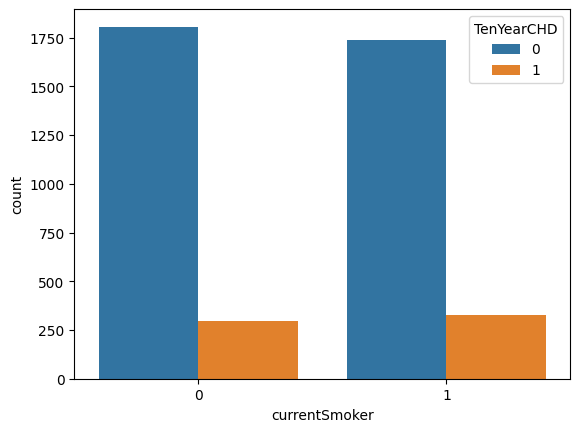

In [183]:
sns.countplot(x='currentSmoker',data=df,hue='TenYearCHD')

Observations:
* Current smokers are slightly more likely to suffer from CHD 

<Axes: xlabel='prevalentHyp', ylabel='count'>

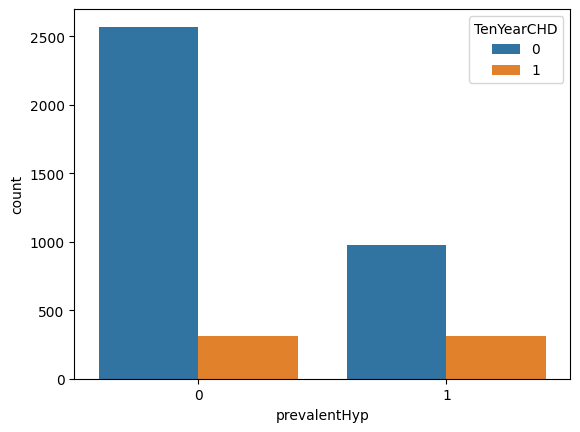

In [184]:
sns.countplot(x='prevalentHyp',data=df,hue='TenYearCHD')

Observations: 
* Higher percentage of people having hypertension suffer from CHD

<Axes: xlabel='BPMeds', ylabel='count'>

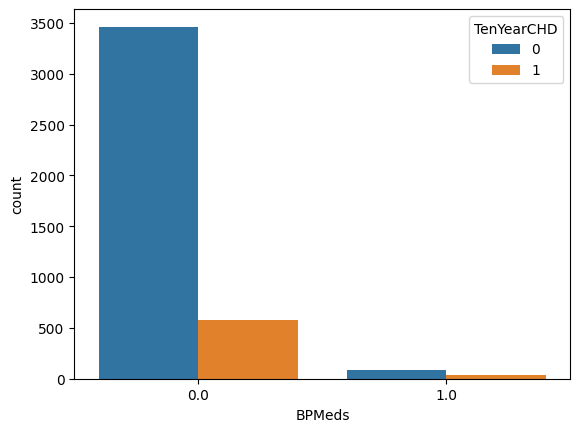

In [185]:
sns.countplot(x='BPMeds',data=df,hue='TenYearCHD')

Observations: 
* About 50-60% of patients taking blood pressure meds get CHD

<Axes: xlabel='diabetes', ylabel='count'>

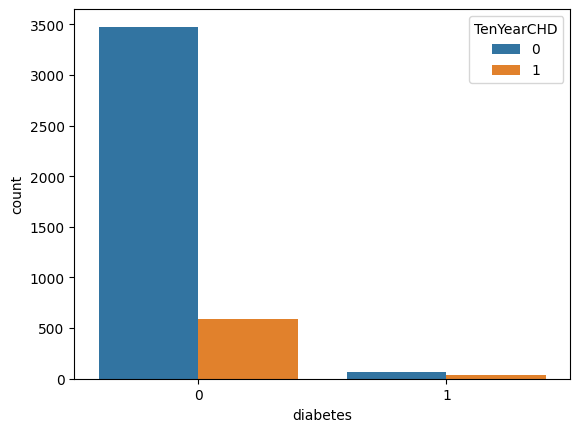

In [186]:
sns.countplot(x='diabetes',data=df,hue='TenYearCHD')

Observations: 60-80% of diabetic patients get CHD

<Axes: xlabel='prevalentStroke', ylabel='count'>

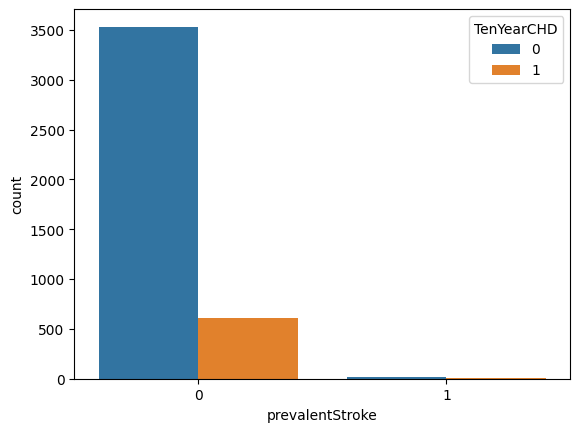

In [187]:
sns.countplot(x='prevalentStroke',data=df,hue='TenYearCHD')

Observations: 
* it seems like 90% of stroke patients get CHD

<Axes: xlabel='TenYearCHD', ylabel='age'>

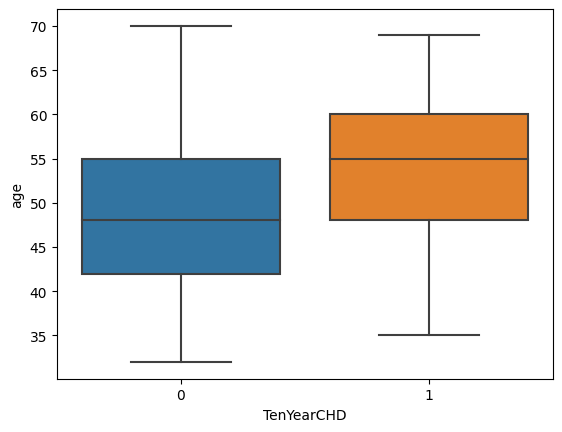

In [188]:
sns.boxplot(y='age',x='TenYearCHD',data=df)

<Axes: xlabel='TenYearCHD', ylabel='age'>

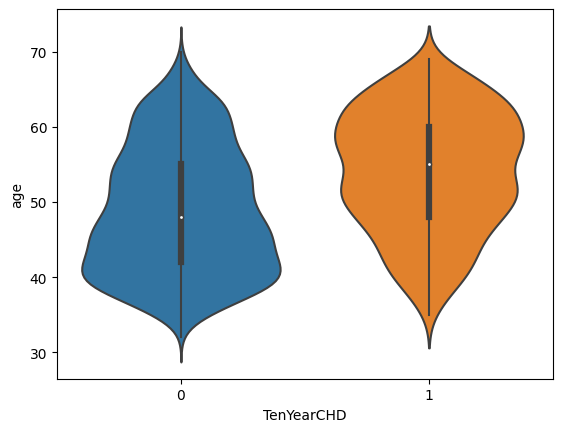

In [189]:
sns.violinplot(y='age',x='TenYearCHD',data=df)

Observations: 
* People who get ten year CHD are usually around the age of 55 years old
* Patients around the age group:35- 45 does not suffer from CHD mostly

<Axes: xlabel='TenYearCHD', ylabel='sysBP'>

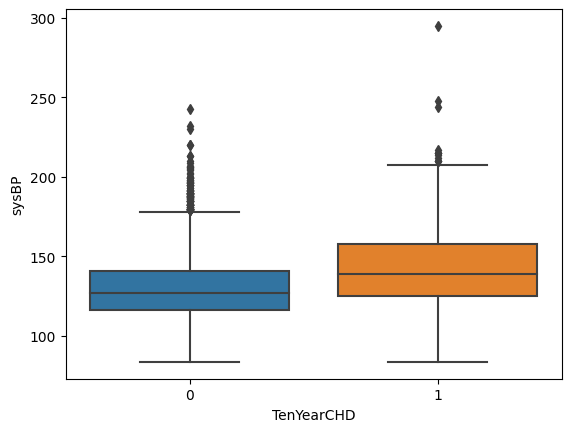

In [190]:
sns.boxplot(y='sysBP',x='TenYearCHD',data=df)

Observations: 
* people who suffer from ten year CHD have higher sysBP  

<Axes: xlabel='TenYearCHD', ylabel='diaBP'>

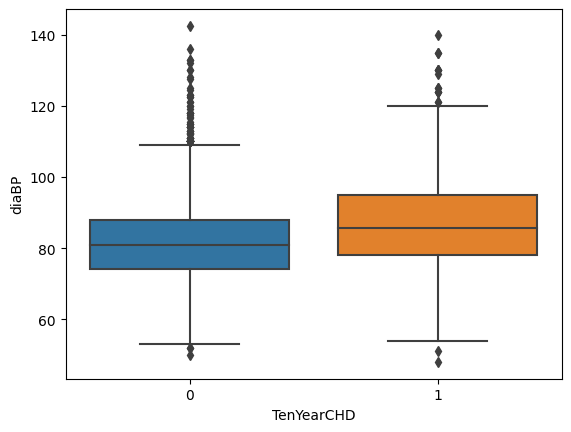

In [191]:
sns.boxplot(y='diaBP',x='TenYearCHD',data=df)

Observations: 
* people who suffer from ten year CHD have slightly higher diaBP 

<Axes: xlabel='TenYearCHD', ylabel='glucose'>

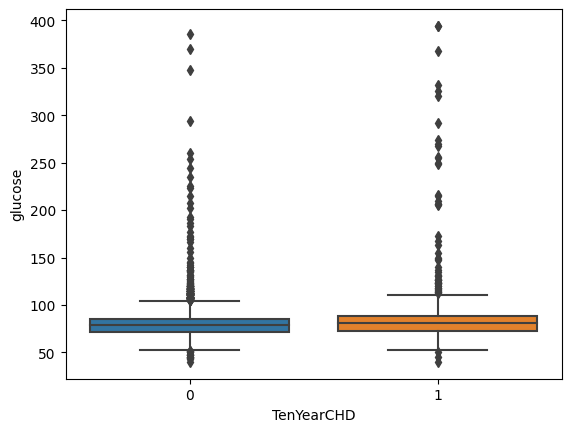

In [192]:
sns.boxplot(y='glucose',x='TenYearCHD',data=df)

Observations: 
* people who suffer from ten year CHD have almost same glucose level compared to people who do not 

<Axes: xlabel='TenYearCHD', ylabel='cigsPerDay'>

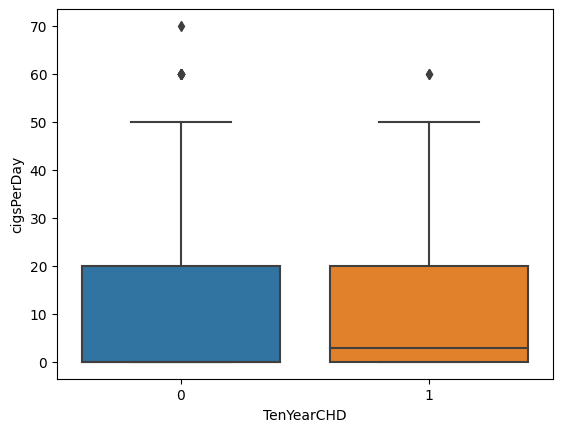

In [193]:
sns.boxplot(y='cigsPerDay',x='TenYearCHD',data=df)

Observatons: 
* people who suffer from ten year CHD have a median value of probably 2 cigs per day 

<Axes: xlabel='TenYearCHD', ylabel='heartRate'>

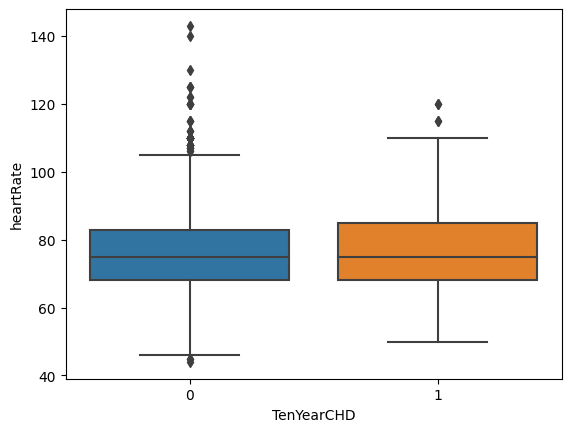

In [194]:
sns.boxplot(y='heartRate',x='TenYearCHD',data=df)

Observations: 
* heart rate is not strongly associated with ten year CHD or not 

<Axes: xlabel='TenYearCHD', ylabel='age'>

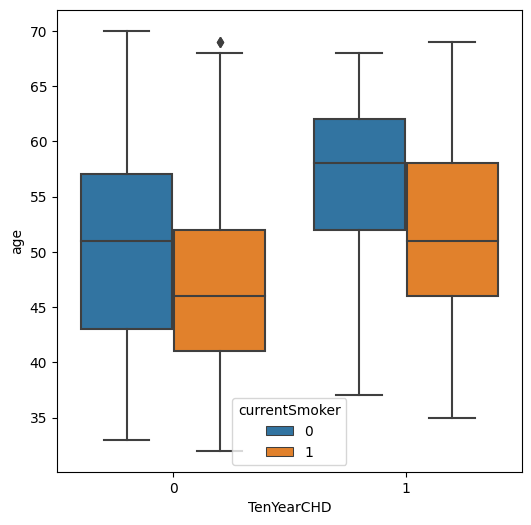

In [195]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker')

<Axes: xlabel='TenYearCHD', ylabel='age'>

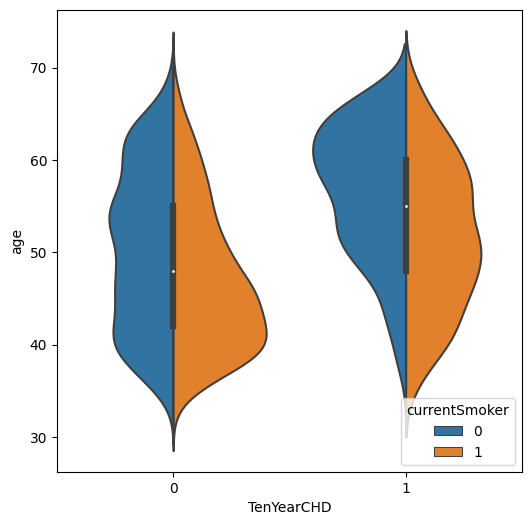

In [196]:
plt.figure(figsize=(6,6))
sns.violinplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker', split=True)

Observations:
* most of smokers having no risk of CHD at around 40 years old
* most of non-smokers having risk are in age around 50-60 years
* most smokers having risk are in age before 50 years old

<Axes: xlabel='TenYearCHD', ylabel='sysBP'>

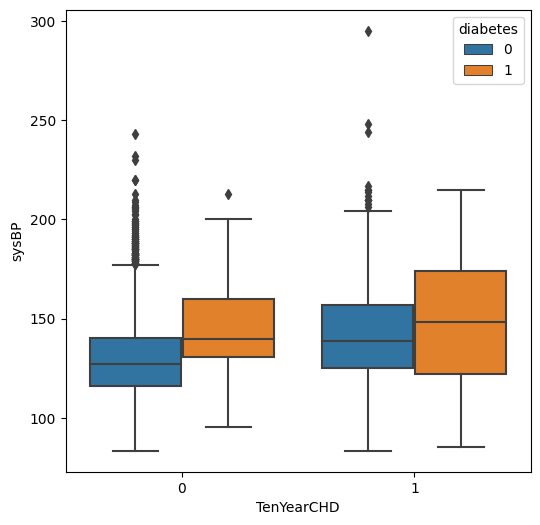

In [197]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, hue='diabetes')

<Axes: xlabel='TenYearCHD', ylabel='sysBP'>

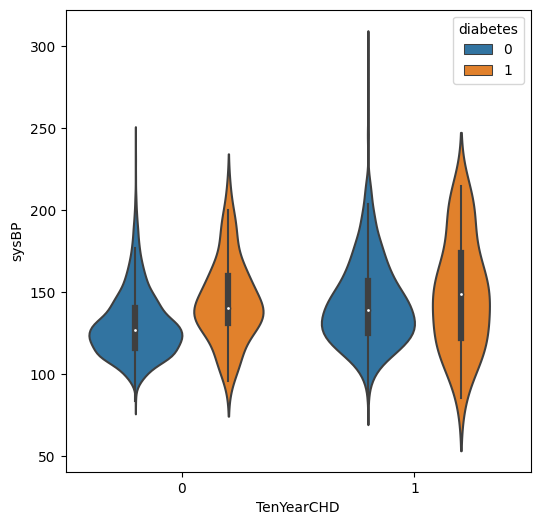

In [198]:
plt.figure(figsize=(6,6))
sns.violinplot(x='TenYearCHD', y='sysBP', data=df, hue='diabetes')

Observations: 
* people who have sysBP level at 125 and without diabetes are more likely to have CHD
* people who have sysBP level ranging from 100 to 150 with diabetes are likely to have CHD


## Section 3: Classification

Typically there are <a href='https://medium.com/search?q=feature+selection'>3 feature selection techniques</a>: 

1. Univariate Selection

2. Feature Importance

3. Correlation Matrix with Heatmap

To choose the most relevant features for univariate selection, one can employ statistical tests to identify those that exhibit the strongest correlation with the output variable.

To facilitate this process, the scikit-learn library offers the SelectKBest class, which can be utilized in conjunction with various statistical tests. This allows for the selection of a predetermined number of features.

In this notebook, the chi-squared (chi²) statistical test is applied to handpick the top 10 features.

#### Feature Selection¶

In [199]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:14]  
y = df.iloc[:,-1]    

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))  

           Specs       Score
9          sysBP  685.370777
13       glucose  359.626586
1            age  297.719840
3     cigsPerDay  240.419399
8        totChol  216.477090
10         diaBP  153.258722
6   prevalentHyp   86.490251
7       diabetes   34.111802
4         BPMeds   29.981333
0           male   21.123376
11           BMI   16.027224


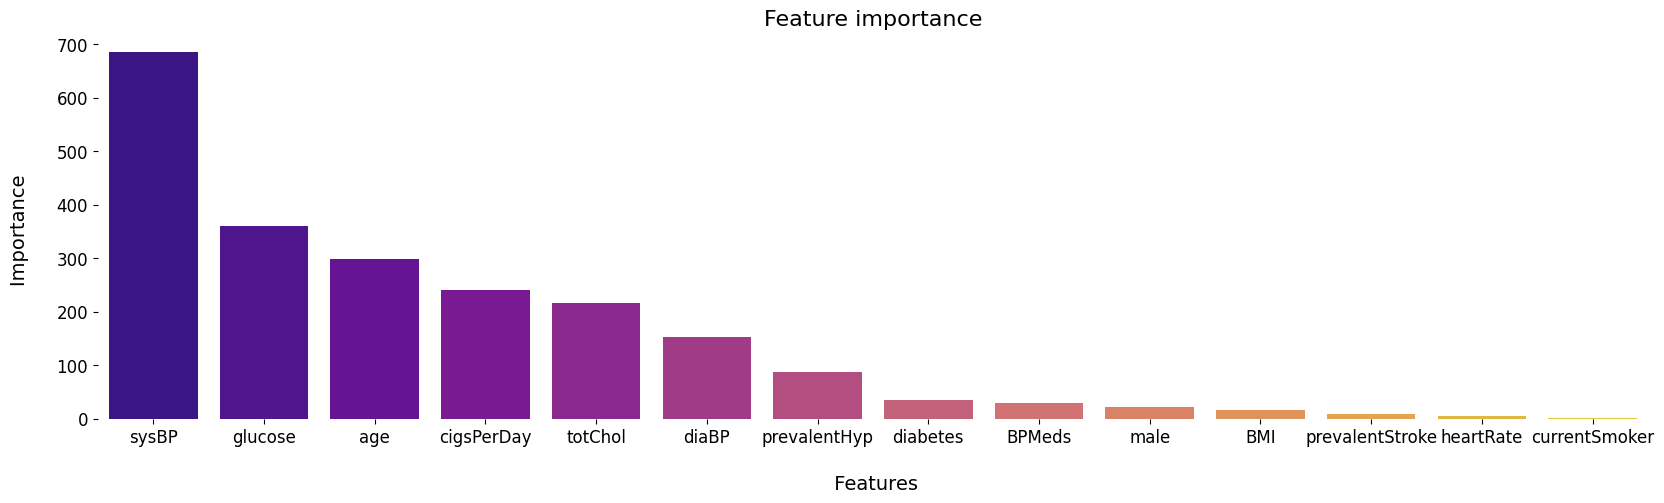

In [200]:
featureScores = featureScores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "plasma")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [201]:
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

In [202]:
new_df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
new_df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


#### Logistics Regression  

In [203]:
X = new_df.drop('TenYearCHD',axis=1)
y = new_df['TenYearCHD']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [205]:
scaler = StandardScaler()

In [206]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [207]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [208]:
log_model.coef_

array([[0.2737129 , 0.14217536, 0.55700801, 0.10776154, 0.24635363,
        0.04017219, 0.12196441, 0.05341179, 0.06996784, 0.26681149]])

This means:
* We can expect the **odds** of having ten year CHD to **increase** by 0.27 unit per unit increase of the sysBP.
* We can expect the **odds** of having ten year CHD to **increase** by 0.14 unit per unit increase of the glucose.
* We can expect the **odds** of having ten year CHD to **increase** by 0.56 unit per unit increase of the age.
* We can expect the **odds** of having ten year CHD to **increase** by 0.11 unit per unit increase of the totChol.
* We can expect the **odds** of having ten year CHD to **increase** by 0.25 unit per unit increase of the cigsPerDay.
* We can expect the **odds** of having ten year CHD to **increase** by 0.04 unit per unit increase of the diaBP.
* We can expect the **odds** of having ten year CHD to **increase** by 0.12 unit if patient has prevalentHyp.
* We can expect the **odds** of having ten year CHD to **increase** by 0.05 unit if patient has diabetes.
* We can expect the **odds** of having ten year CHD to **increase** by 0.07 unit per unit increase of the BPMeds.
* We can expect the **odds** of having ten year CHD to **increase** by 0.27 unit if patient is a male.

In [209]:
y_pred = log_model.predict(X_test)

In [210]:
accuracy_score(y_test,y_pred)

0.8573141486810552

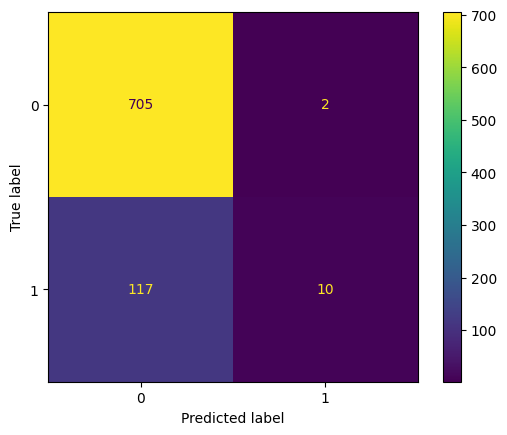

In [211]:
# create confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()
plt.show()

True Positives: 10

True Negatives: 705

False Positives: 2 (Type I error)

False Negatives: 117 (Type II error)

In [212]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [213]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8573141486810552 
 The Missclassification = 1-Accuracy =  0.14268585131894485 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.07874015748031496 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9971711456859972 
 Positive Predictive value = TP/(TP+FP) =  0.8333333333333334 
 Negative predictive Value = TN/(TN+FN) =  0.8576642335766423 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  27.83464566929147 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9238733456190317


Sensitivity (also known as True Positive Rate or Recall) is a performance metric that measures the proportion of actual positive cases correctly identified by a model. It is calculated by dividing the number of true positive predictions (TP) by the sum of true positives and false negatives (TP + FN). In the provided example, the sensitivity is calculated as follows:

Sensitivity = TP / (TP + FN) = 0.07874015748031496 

This means that the model correctly identified 7.87% of the actual positive cases.

Specificity (also known as True Negative Rate) is a performance metric that measures the proportion of actual negative cases correctly identified by a model. It is calculated by dividing the number of true negative predictions (TN) by the sum of true negatives and false positives (TN + FP). In the provided example, the specificity is calculated as follows:

Specificity = TN / (TN + FP) = 0.9971711456859972 

This means that the model correctly identified 99.72% of the actual negative cases.

From the provided statistics, it is evident that the model has a high specificity (True Negative Rate) and a low sensitivity (True Positive Rate). This implies that the model is better at accurately predicting negative cases (true negatives) compared to positive cases (true positives). In other words, the model is more inclined towards correctly identifying non-events or instances that do not belong to the positive class.

In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       707
           1       0.83      0.08      0.14       127

    accuracy                           0.86       834
   macro avg       0.85      0.54      0.53       834
weighted avg       0.85      0.86      0.80       834



Observations: 

* Precision: Precision is the ratio of true positive predictions to the total number of positive predictions. For class 0, the precision is 0.86, indicating that 86% of the instances predicted as class 0 were correct. For class 1, the precision is 1.00, meaning that all instances predicted as class 1 were correct. However, it's important to note that the precision for class 1 should be interpreted with caution due to the low recall for that class.
* Recall: Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances. For class 0, the recall is 1.00, meaning that the model correctly identified all of the actual class 0 instances. For class 1, the recall is 0.08, indicating that the model only identified 8% of the actual class 1 instances. This low recall suggests that the model struggles to correctly identify class 1 instances.
* F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. For class 0, the F1-score is 0.92, reflecting a good balance between precision and recall. However, for class 1, the F1-score is only 0.14, indicating a poor performance due to the low recall for that class.
* Accuracy: The overall accuracy of the model is 0.86, meaning that it correctly predicted the class for 86% of the instances in the dataset.

Overall, the model performs well for class 0 with high precision, recall, and F1-score. However, it struggles to correctly identify class 1 instances, as reflected by the low recall and F1-score for that class.

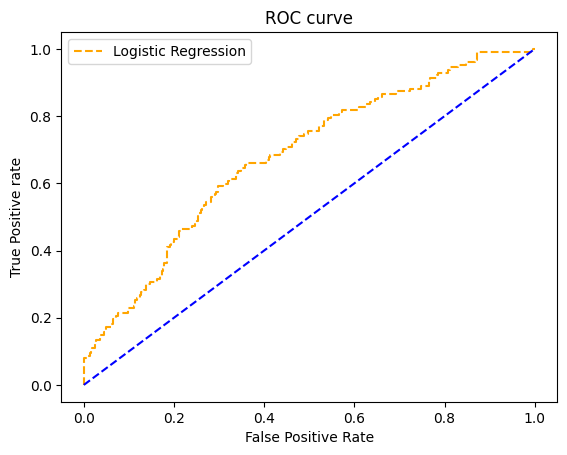

In [218]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_yes = log_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_yes[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, y_prob_yes[:,1])
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### K nearest neighbor (KNN)

In [67]:
X = new_df.drop('TenYearCHD',axis=1)
y = new_df['TenYearCHD']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [69]:
scaler = StandardScaler()

In [70]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [73]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
y_pred = knn_model.predict(scaled_X_test)

In [75]:
print("Train set Accuracy: ", accuracy_score(y_train, knn_model.predict(scaled_X_train)))
print('Test set accuracy:', accuracy_score(y_test,y_pred))

Train set Accuracy:  1.0
Test set accuracy: 0.7829736211031175


In [76]:
confusion_matrix(y_test,y_pred)

array([[631,  76],
       [105,  22]])

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       707
           1       0.22      0.17      0.20       127

    accuracy                           0.78       834
   macro avg       0.54      0.53      0.54       834
weighted avg       0.76      0.78      0.77       834



##### Elbow Method for Choosing K Values

In [78]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

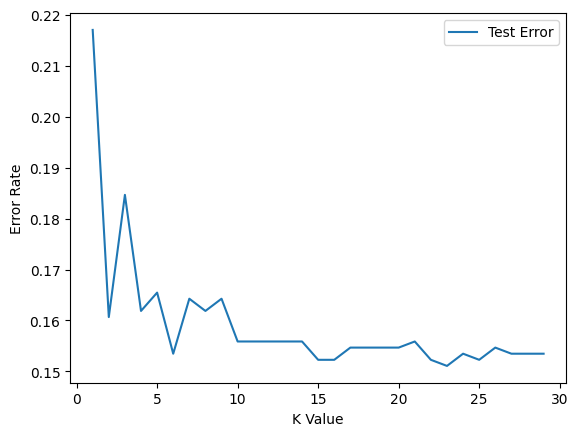

In [79]:
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

##### Full Cross Validation Grid Search for K Value

In [80]:
scaler = StandardScaler()

In [81]:
knn = KNeighborsClassifier()

In [82]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [83]:
operations = [('scaler',scaler),('knn',knn)]

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
pipe = Pipeline(operations)

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
k_values = list(range(1,10))

In [88]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [89]:
param_grid = {'knn__n_neighbors': k_values}

In [90]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [91]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [92]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=8))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=8),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 8,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [93]:
# calculate the accuracy of KNN for different values of k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75419664, 0.82853717, 0.8057554 , 0.83093525, 0.81294964,
       0.8381295 , 0.83573141, 0.84532374, 0.84052758])

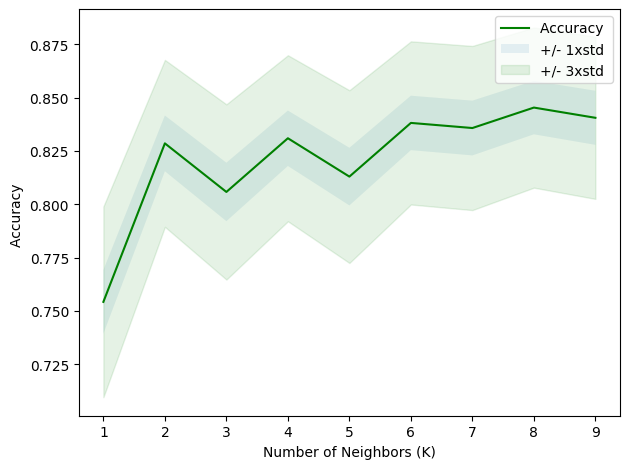

In [94]:
# plot the model accuracy for a different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [95]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8453237410071942 with k= 8


In [96]:
full_pred = full_cv_classifier.predict(X_test)

In [97]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       707
           1       0.30      0.05      0.08       127

    accuracy                           0.84       834
   macro avg       0.58      0.51      0.50       834
weighted avg       0.77      0.84      0.78       834



#### Decision Trees

In [98]:
new_df

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.000000,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.000000,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.000000,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.000000,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.000000,46,285.0,23.0,84.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4234,126.5,68.000000,51,207.0,43.0,80.0,0,0,0.0,1,0
4236,126.5,81.963655,44,210.0,15.0,87.0,0,0,0.0,0,0
4237,133.5,107.000000,52,269.0,0.0,83.0,0,0,0.0,0,0
4238,141.0,72.000000,40,185.0,0.0,98.0,1,0,0.0,1,0


In [99]:
X = pd.get_dummies(new_df.drop('TenYearCHD', axis = 1), drop_first=True)
y = new_df['TenYearCHD']

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
DecisionTreeModel = DecisionTreeClassifier()

In [104]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
base_pred = DecisionTreeModel.predict(X_test)

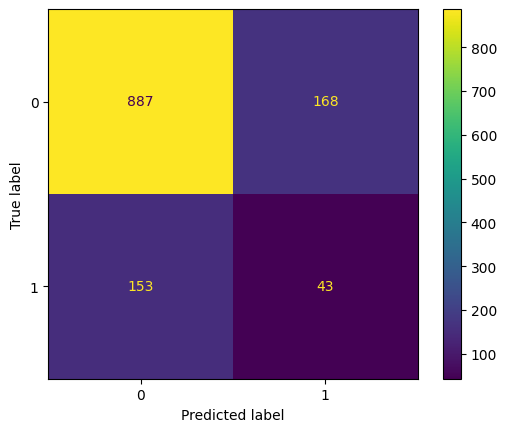

In [106]:
cm = confusion_matrix(y_test, base_pred, labels=DecisionTreeModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DecisionTreeModel.classes_)
disp.plot()
plt.show()

In [107]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1055
           1       0.20      0.22      0.21       196

    accuracy                           0.74      1251
   macro avg       0.53      0.53      0.53      1251
weighted avg       0.75      0.74      0.75      1251



In [108]:
DecisionTreeModel.feature_importances_

array([0.18703951, 0.18650437, 0.14294939, 0.18930063, 0.07342213,
       0.15537048, 0.01335755, 0.00687105, 0.00779029, 0.0373946 ])

In [109]:
pd.DataFrame(index=X.columns,data=DecisionTreeModel.feature_importances_,columns=['Feature Importance'])

,Feature Importance
sysBP,0.187040
glucose,0.186504
age,0.142949
totChol,0.189301
cigsPerDay,0.073422
diaBP,0.155370
prevalentHyp,0.013358
diabetes,0.006871
BPMeds,0.007790
male,0.037395


#### Random Forest

In [110]:
X = new_df.drop('TenYearCHD', axis = 1)
y = new_df['TenYearCHD']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [114]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [117]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [118]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 100, 'oob_score': True}

In [119]:
y_pred = grid.predict(X_test)

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       529
           1       0.56      0.09      0.16        97

    accuracy                           0.85       626
   macro avg       0.71      0.54      0.54       626
weighted avg       0.81      0.85      0.80       626



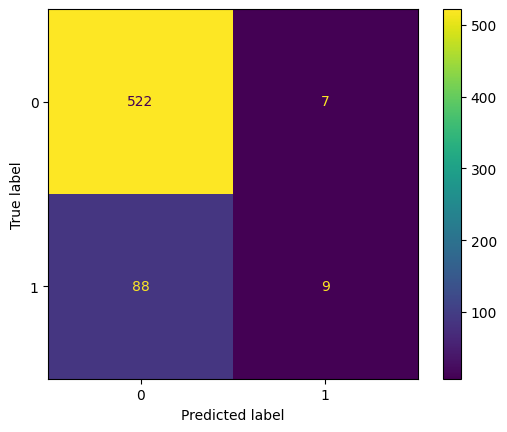

In [121]:
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.show()

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

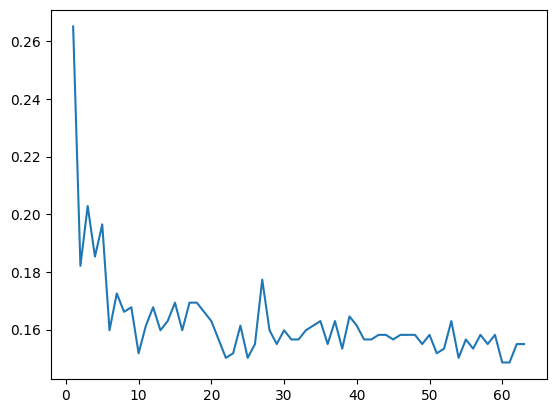

In [124]:
plt.plot(range(1,64),errors)

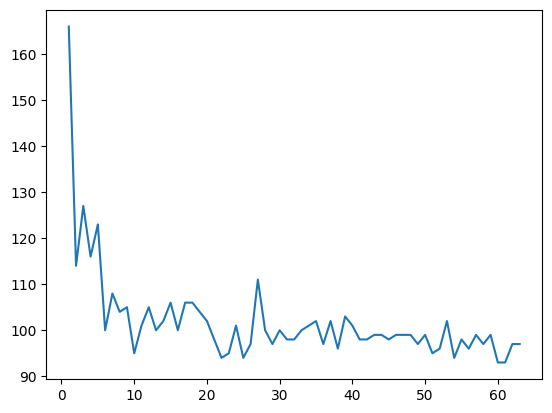

In [125]:
plt.plot(range(1,64),misclassifications)

#### Support Vector Machine

In [126]:
from sklearn.svm import SVC

In [127]:
X = new_df.drop('TenYearCHD',axis=1)
y = new_df['TenYearCHD']

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [131]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [132]:
grid.best_score_

0.8507322353401794

In [133]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}